# 00 - Tổng Quan Dữ Liệu Ban Đầu

## Mục tiêu:
- Nạp dữ liệu gốc và xem tổng quan.
- Thống kê nhanh các cột dạng số và phân loại.
- Phát hiện sơ bộ dữ liệu nhiễu, sai lệch hoặc thiếu.
- Định hướng cho bước làm sạch ở `01_data_cleaning.ipynb`.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu gốc
df = pd.read_csv("../data/raw/train.csv")
sns.set_theme(style="whitegrid", palette="viridis")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
# Xem kích thước
print("Kích thước dữ liệu:", df.shape)

# Hiển thị 5 dòng đầu
df.head()


Kích thước dữ liệu: (140700, 20)


,id,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Thông tin tổng quan
- Kiểm tra kiểu dữ liệu các cột
- Phân tích tỷ lệ thiếu

In [19]:
# Kiểu dữ liệu và thông tin tổng quan
df.info()

# Tỷ lệ thiếu theo cột
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0]  # Chỉ hiển thị cột có thiếu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   name                                   140700 non-null  object 
 2   gender                                 140700 non-null  object 
 3   age                                    140700 non-null  float64
 4   city                                   140700 non-null  object 
 5   working_professional_or_student        140700 non-null  object 
 6   profession                             104070 non-null  object 
 7   academic_pressure                      27897 non-null   float64
 8   work_pressure                          112782 non-null  float64
 9   cgpa                                   27898 non-null   float64
 10  study_satisfaction                     27897 non-null   

study_satisfaction    0.801727
academic_pressure     0.801727
cgpa                  0.801720
profession            0.260341
work_pressure         0.198422
job_satisfaction      0.198365
dietary_habits        0.000028
financial_stress      0.000028
degree                0.000014
dtype: float64

## Thống kê mô tả
- Dành cho các cột dạng số
- Giúp xác định ngoại lệ sơ bộ (min/max bất thường)

In [20]:
df.describe()

,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress,depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Phân tích các cột phân loại
- Hiển thị top các giá trị phổ biến cho từng cột dạng `object`
- Tìm bất thường trong các giá trị như city, degree, gender...

In [21]:
cat_cols = df.columns

for col in cat_cols:
    print(f"\n🔸 {col} (unique: {df[col].nunique()}):")
    print(df[col].value_counts(dropna=False).head(10))



🔸 id (unique: 140700):
id
0        1
93803    1
93797    1
93798    1
93799    1
93800    1
93801    1
93802    1
93804    1
93778    1
Name: count, dtype: int64

🔸 name (unique: 422):
name
Rohan          3178
Aarav          2336
Rupak          2176
Aaradhya       2045
Anvi           2035
Raghavendra    1877
Vani           1657
Tushar         1596
Ritvik         1589
Shiv           1568
Name: count, dtype: int64

🔸 gender (unique: 2):
gender
Male      77464
Female    63236
Name: count, dtype: int64

🔸 age (unique: 43):
age
56.0    5246
49.0    5099
38.0    4564
53.0    4526
57.0    4395
47.0    4199
46.0    4080
54.0    3928
51.0    3927
18.0    3921
Name: count, dtype: int64

🔸 city (unique: 98):
city
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Name: count, dtype: int64

🔸 working_professional_or_student (uniqu

# Trực quan hóa Biến số liên tục bằng Biểu đồ Histogram

In [22]:
# df = df[df['Working Professional or Student'] == 'Student'].copy()
# df = df[(df['Age'] >= 18) & (df['Age'] <= 24)]
# print(f"Số dòng còn lại sau lọc: {len(df)}")

In [23]:

# Giả sử bạn đã đọc dữ liệu vào DataFrame df
# df = pd.read_csv(...)

# Thiết lập style chung cho các biểu đồ
sns.set_theme(style="whitegrid", palette="plasma") # Đổi sang một palette màu khác
plt.rcParams['font.family'] = 'Segoe UI'

# --- Bắt đầu phần code vẽ biểu đồ ---

# 1. Liệt kê ĐẦY ĐỦ các cột số bạn muốn phân tích
# (Bao gồm cả các cột thang điểm 1-5)
numeric_cols = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress',
    
]

print("--- BẮT ĐẦU VẼ HISTOGRAM CHO CÁC BIẾN SỐ LIÊN TỤC ---")

# 2. Dùng một vòng lặp duy nhất để vẽ cho tất cả các cột
for col in numeric_cols:
    plt.figure(figsize=(9.5, 5.8))
    
    # Vẽ histogram với đường cong mật độ (KDE)
    sns.histplot(data=df, x=col, kde=True, bins=25)
    
    # --- CẢI TIẾN: Thêm đường Mean và Median vào biểu đồ ---
    # Tính toán giá trị trung bình và trung vị
    mean_value = df[col].mean()
    median_value = df[col].median()
    
    # Vẽ các đường thẳng đứng để đánh dấu
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    
    # Hiển thị chú thích cho các đường vừa vẽ
    plt.legend()
    
    # Đặt tiêu đề và nhãn cho các trục
    plt.title(f'Phân phối của {col.replace("_", " ").capitalize()}', fontsize=16, weight='bold')
    plt.xlabel(col.replace("_", " ").capitalize(), fontsize=12)
    plt.ylabel('Số lượng (Tần suất)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

print("--- HOÀN THÀNH ---")

--- BẮT ĐẦU VẼ HISTOGRAM CHO CÁC BIẾN SỐ LIÊN TỤC ---


ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

<Figure size 950x580 with 0 Axes>

# Trực quan hóa Biến phân loại bằng Biểu đồ cột (Bar Chart)

--- BẮT ĐẦU VẼ BIỂU ĐỒ CHO CÁC BIẾN PHÂN LOẠI ---
Đang vẽ biểu đồ đứng cho cột 'Gender'...


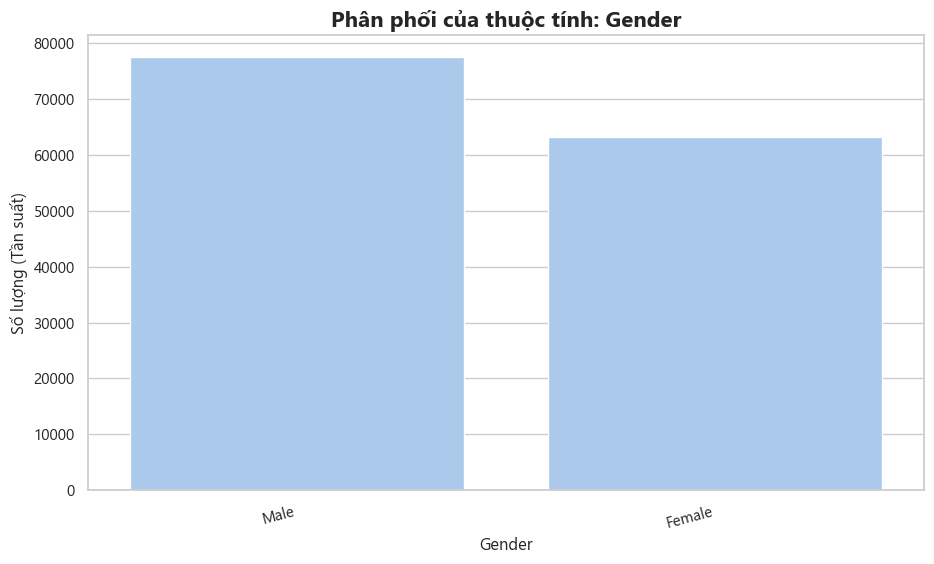

Đang vẽ biểu đồ ngang cho cột 'City' (hiển thị top 15)...


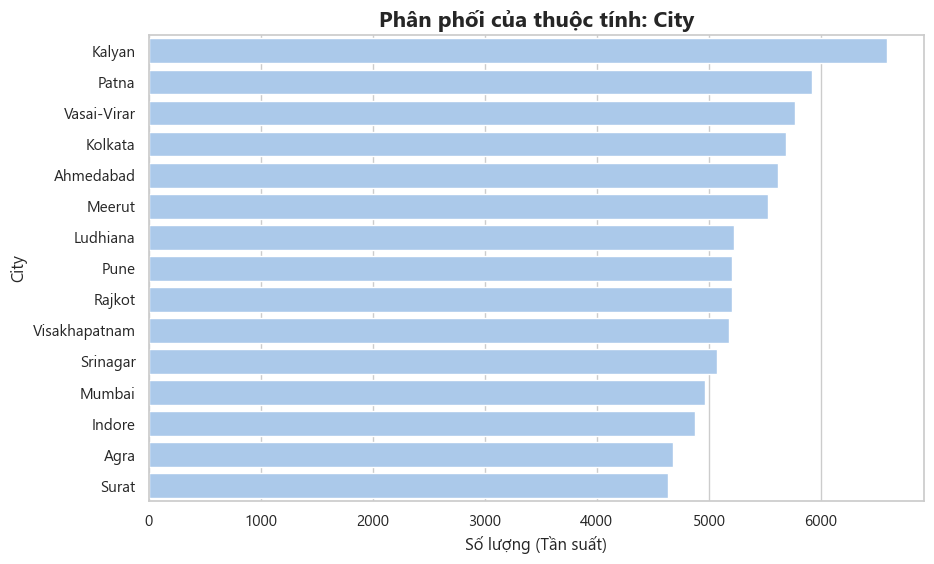

Đang vẽ biểu đồ đứng cho cột 'Working Professional or Student'...


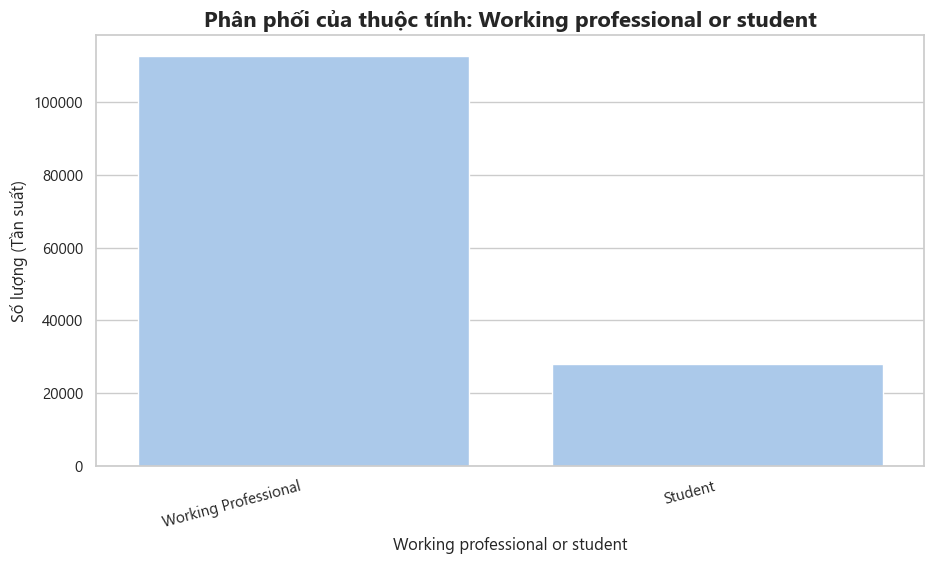

Đang vẽ biểu đồ ngang cho cột 'Profession' (hiển thị top 15)...


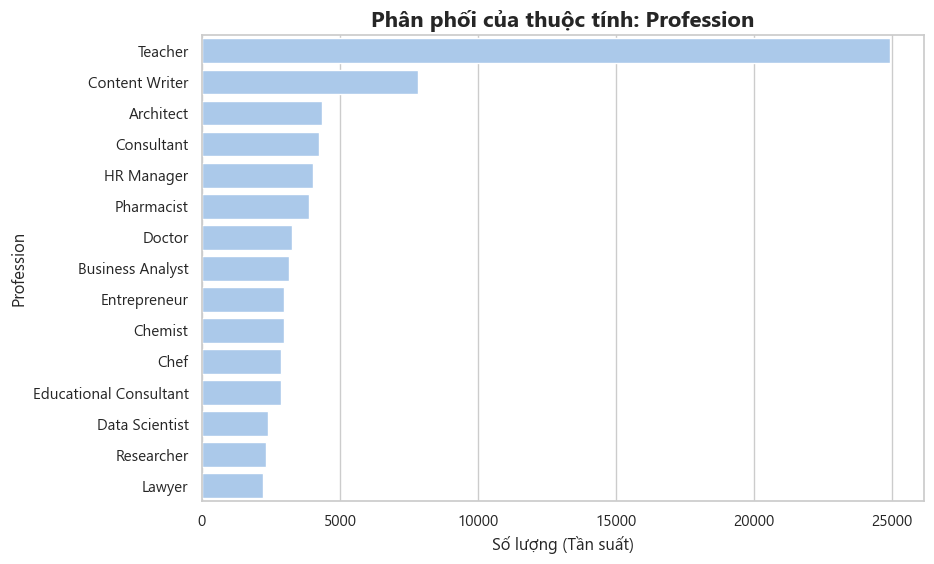

Đang vẽ biểu đồ ngang cho cột 'Sleep Duration' (hiển thị top 15)...


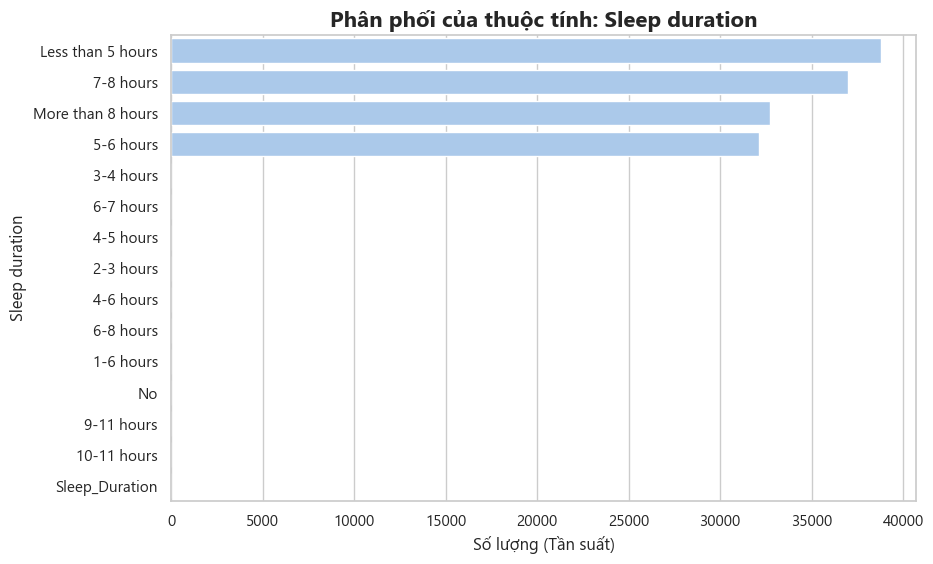

Đang vẽ biểu đồ ngang cho cột 'Dietary Habits' (hiển thị top 15)...


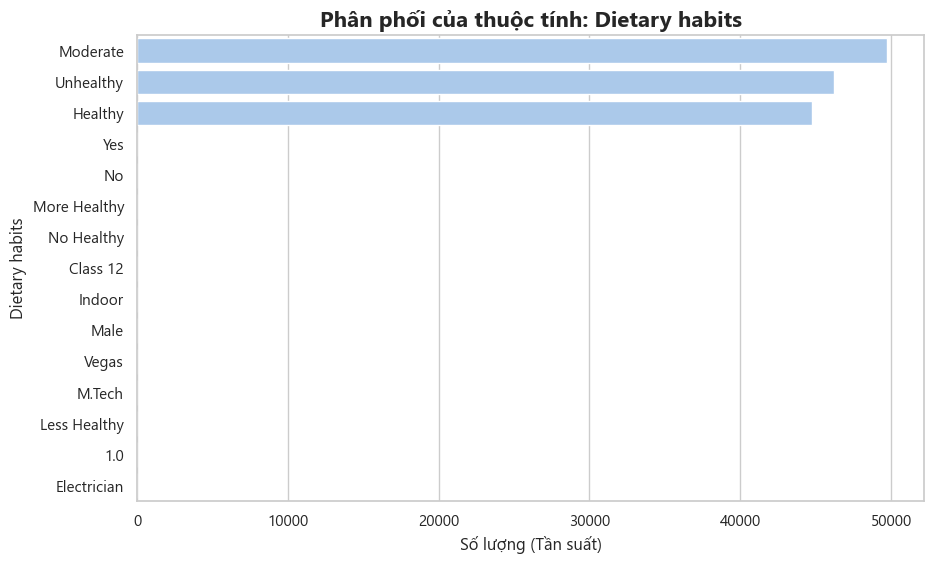

Đang vẽ biểu đồ ngang cho cột 'Degree' (hiển thị top 15)...


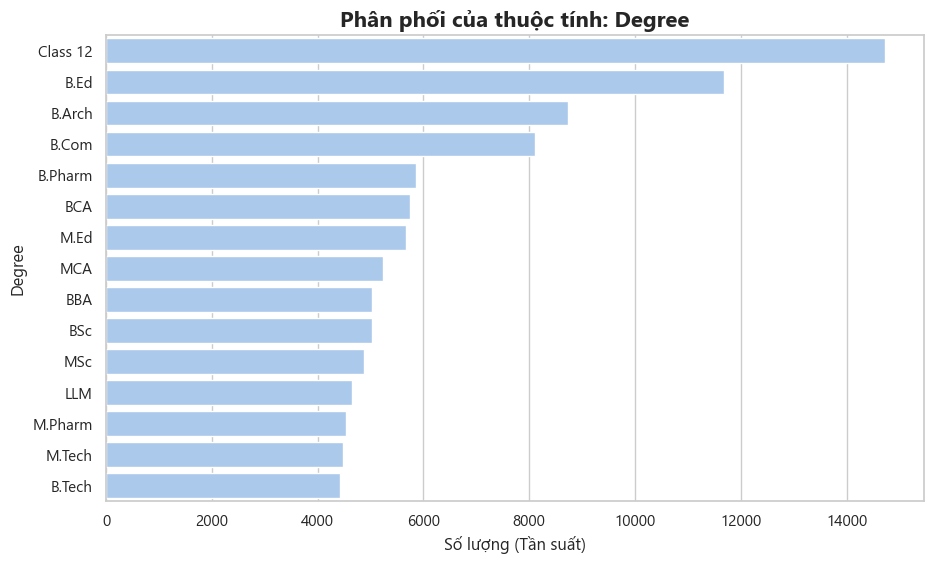

Đang vẽ biểu đồ đứng cho cột 'Have you ever had suicidal thoughts ?'...


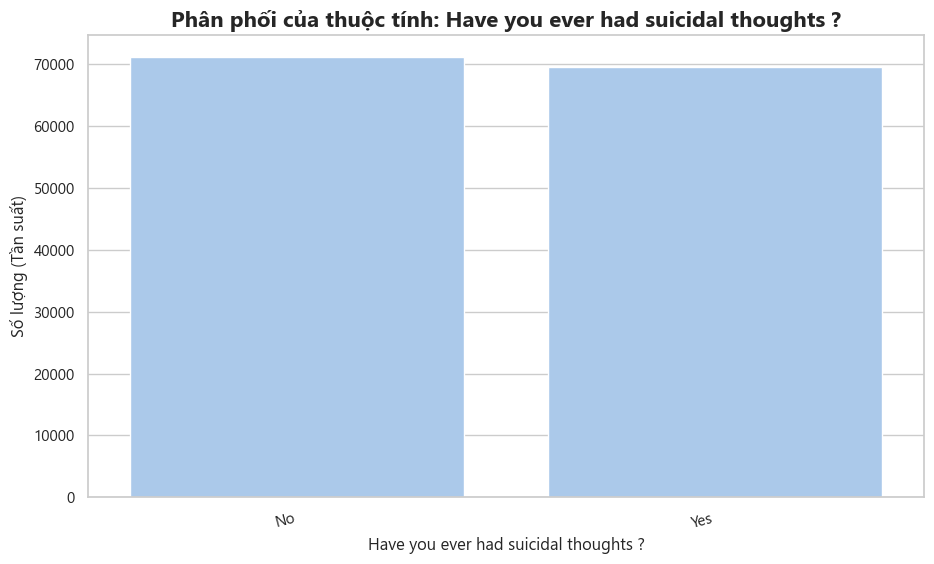

Đang vẽ biểu đồ đứng cho cột 'Family History of Mental Illness'...


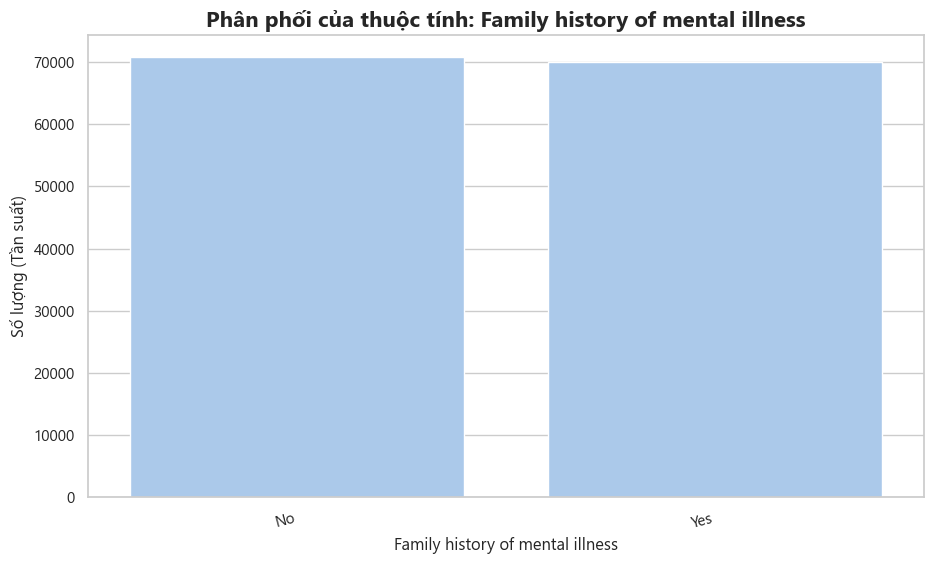

Đang vẽ biểu đồ đứng cho cột 'Depression'...


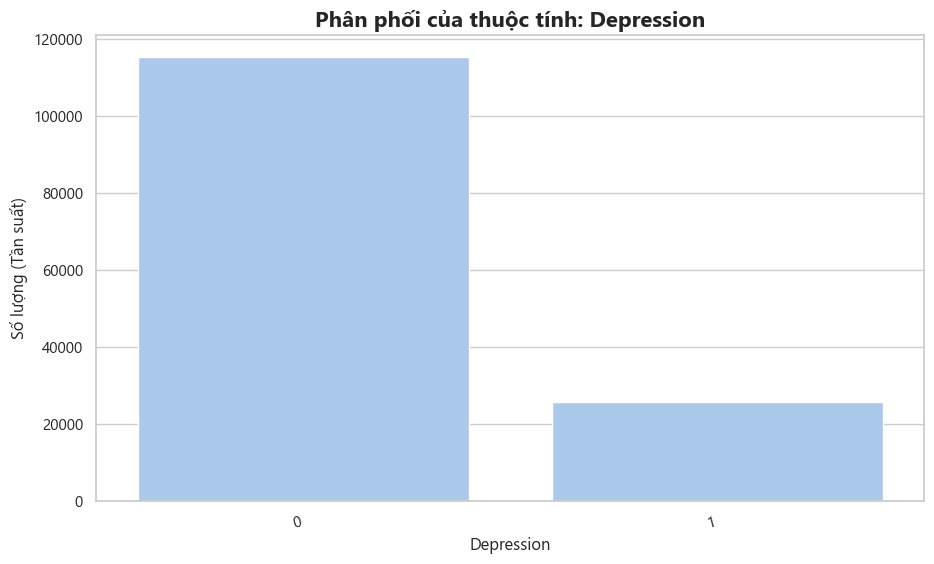

--- HOÀN THÀNH ---


In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['font.family'] = 'Segoe UI' # Dùng font Segoe UI cho Tiếng Việt

# --- Bắt đầu phần code vẽ biểu đồ ---

# 1. Liệt kê tất cả các cột phân loại bạn muốn phân tích
categorical_cols = [
    'Gender', 
    'City',
    'Working Professional or Student',
    'Profession',
    'Sleep Duration', 
    'Dietary Habits', 
    'Degree', 
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
    'Depression'
    
]

print("--- BẮT ĐẦU VẼ BIỂU ĐỒ CHO CÁC BIẾN PHÂN LOẠI ---")

# 2. Dùng vòng lặp để vẽ biểu đồ cho từng cột
for col in categorical_cols:
    plt.figure(figsize=(9.5, 5.8)) # Tạo một khung hình mới cho mỗi biểu đồ

    # --- Logic thông minh để xử lý các cột có nhiều hạng mục ---
    # Nếu một cột có hơn 10 giá trị duy nhất (ví dụ: city, degree),
    # chúng ta sẽ vẽ biểu đồ ngang và chỉ hiển thị 15 hạng mục phổ biến nhất.
    if df[col].nunique() > 10:
        print(f"Đang vẽ biểu đồ ngang cho cột '{col}' (hiển thị top 15)...")
        
        # Lấy 15 hạng mục có số lượng nhiều nhất
        top_categories = df[col].value_counts().nlargest(15).index
        
        # Vẽ biểu đồ đếm cho top 15 hạng mục đó
        sns.countplot(
            data=df[df[col].isin(top_categories)], # Chỉ lọc dữ liệu của top 15
            y=col, # Dùng trục y để vẽ biểu đồ ngang, dễ đọc hơn
            order=top_categories
        )
        
        plt.xlabel('Số lượng (Tần suất)', fontsize=12)
        plt.ylabel(col.replace("_", " ").capitalize(), fontsize=12)
        
    # Ngược lại, với các cột có ít hạng mục, chúng ta vẽ biểu đồ đứng như bình thường.
    else:
        print(f"Đang vẽ biểu đồ đứng cho cột '{col}'...")
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index # Sắp xếp các cột từ cao đến thấp
        )
        plt.xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        plt.ylabel('Số lượng (Tần suất)', fontsize=12)
        # Xoay nhãn trục x nếu cần để tránh bị chồng chéo
        plt.xticks(rotation=15, ha='right')


    # Đặt tiêu đề chung cho biểu đồ
    plt.title(f'Phân phối của thuộc tính: {col.replace("_", " ").capitalize()}', fontsize=16, weight='bold')
    plt.tight_layout() # Tự động điều chỉnh cho vừa vặn
    plt.show() # Hiển thị biểu đồ

print("--- HOÀN THÀNH ---")

## Định hướng xử lý tiếp theo

### Các bước cần làm sạch:

- **City**:
  - Có chứa **tên người** hoặc giá trị nhiễu.
  - Có thể có lỗi chính tả (`Khaziabad`, `Nalyan`, ...).
  - Cần **ánh xạ theo cấp độ đô thị Ấn Độ sang tỉnh/thành Việt Nam** theo bảng quy tắc đã xác định.

- **Degree**:
  - Bằng cấp đa dạng, có nhiều viết tắt.
  - Cần **ánh xạ sang hệ thống bằng cấp Việt hóa** rõ ràng theo bảng chuyển đổi chi tiết.

- **Gender**,**Have you ever had suicidal thoughts ?**,**Family history of mental illness**:
  - Cần chuẩn hóa về dạng nhị phân `1 (Yes)` và `0 (No)` để thuận tiện cho mô hình.

- **Cột dư thừa cần loại bỏ**:
  - `id`: không có giá trị phân tích.
  - `Work Pressure`, `Job Satisfaction`: bị trùng lặp logic với các cột đã có hoặc không nhất quán.
  
---

**Tiếp tục với**:  
`01_data_cleaning.ipynb` để xử lý và làm sạch dữ liệu nhiễu trước khi thực hiện mã hóa (`Label Encoding`) và trích xuất đặc trưng.
